In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls '/content/gdrive/My Drive/cat-dogs/New folder'

cats_dogs.h5  cats_dogs_resnet.h5  test  train	validation


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import os

In [4]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense

In [5]:
model = Sequential()
# Sequential needed for add method
model.add(ResNet50(include_top = False, pooling = 'avg' ,weights = 'imagenet'))
model.add(Dense(2, activation='softmax'))
model.layers[0].trainable = False

94773248/94765736 [==============================] - 2s 0us/step


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
from keras import optimizers
sgd = 'sgd'
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])

In [8]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_data_generator = ImageDataGenerator(preprocess_input, 
                                          horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

validation_data_generator = ImageDataGenerator(preprocess_input)

In [10]:
train_generator = train_data_generator.flow_from_directory(
    '/content/gdrive/My Drive/cat-dogs/New folder/train',
    target_size=(224, 224),
    batch_size = 32,
    class_mode='categorical'
)
validation_generator = validation_data_generator.flow_from_directory(
    '/content/gdrive/My Drive/cat-dogs/New folder/validation',
     target_size=(224, 224),
    batch_size = 32,
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [11]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000//32,
    validation_data=validation_generator,
    validation_steps=800//32,
    epochs=10
)

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
62/62 [==============================] - 1004s 16s/step - loss: 0.2755 - acc: 0.8994 - val_loss: 0.0969 - val_acc: 0.9675
Epoch 2/10
62/62 [==============================] - 31s 505ms/step - loss: 0.0987 - acc: 0.9593 - val_loss: 0.0952 - val_acc: 0.9600
Epoch 3/10
62/62 [==============================] - 31s 506ms/step - loss: 0.0808 - acc: 0.9715 - val_loss: 0.1002 - val_acc: 0.9588
Epoch 4/10
62/62 [==============================] - 31s 505ms/step - loss: 0.0734 - acc: 0.9715 - val_loss: 0.0862 - val_acc: 0.9600
Epoch 5/10
62/62 [==============================] - 31s 494ms/step - loss: 0.0650 - acc: 0.9756 - val_loss: 0.0935 - val_acc: 0.9588
Epoch 6/10
62/62 [==============================] - 31s 493ms/step - loss: 0.0691 - acc: 0.9766 - val_loss: 0.1025 - val_acc: 0.9563
Epoch 7/10
62/62 [==============================] - 31s 496ms/step - loss: 0.0615 - acc: 0.9771 - val_loss: 0.0880 - val_acc: 0.9588
Epoch 8/10
62/62 [==============================] - 31s 494ms/step - 

In [12]:
# 94 sgd
# 84 adam
# new data agumn 98

In [13]:
model.save('/content/gdrive/My Drive/cat-dogs/New folder/cats_dogs_resnet.h5')

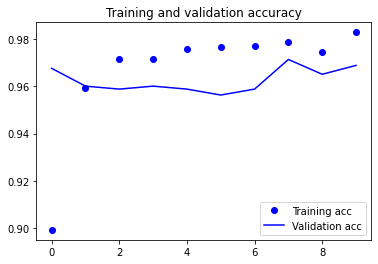

In [14]:
acc = fit_history.history['acc']
val_acc = fit_history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()